In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [2]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [17]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    print(results.shape)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        #print(results[i, sequence])
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [19]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [20]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [24]:
from keras import optimizers
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=[metrics.binary_accuracy])

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train, 
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5370 - acc: 0.7777 - val_loss: 0.4085 - val_acc: 0.8520
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3221 - acc: 0.9004 - val_loss: 0.3282 - val_acc: 0.8790
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2313 - acc: 0.9263 - val_loss: 0.3065 - val_acc: 0.8800
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1785 - acc: 0.9441 - val_loss: 0.2791 - val_acc: 0.8877
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1454 - acc: 0.9555 - val_loss: 0.2898 - val_acc: 0.8879
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1206 - acc: 0.9637 - val_loss: 0.2947 - val_acc: 0.8869
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0963 - acc: 0.9723 - val_loss: 0.3134 - val_acc: 0.8850
Epoch 8/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0764 - acc: 0.

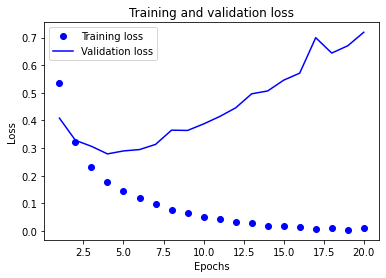

In [30]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label ='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()
acc = history_dict['acc']